Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [5]:
!pip install tensorflow keras
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link:


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/wine.data')

# Explore the dataset
print("Dataset Dimensions:", df.shape)
df.head()


Dataset Dimensions: (177, 14)


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
# Adding column names
column_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
                'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
                'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'quality']
df.columns = column_names
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0        1       13.20  1.78               2.14       11.2            100   
1        1       13.16  2.36               2.67       18.6            101   
2        1       14.37  1.95               2.50       16.8            113   
3        1       13.24  2.59               2.87       21.0            118   
4        1       14.20  1.76               2.45       15.2            112   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        2.65                  2.76             0.26             1.28  4.38   
1        2.80                  3.24             0.30             2.81  5.68   
2        3.85                  3.49             0.24             2.18  7.80   
3        2.80                  2.69             0.39             1.82  4.32   
4        3.27                  3.39             0.34             1.97  6.75   

   od280/od315_of_diluted_wines  proline  quality  
0         

Q3. Check for null values, identify categorical variables, and encode them.


In [8]:
# Check for null values
print("Null values:\n", df.isnull().sum())

# Identify categorical variables (if any) and encode them
# Encode the target variable 'quality'
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)


Null values:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64


Q4. Separate the features and target variables from the dataset.


In [9]:
# Separate features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.


In [10]:
from sklearn.model_selection import train_test_split

# Perform train-test split (80% train, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test (50% each, resulting in 10% each from original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Q6. Scale the dataset using an appropriate scaling technique.


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Q7. Design and implement at least two hidden layers and an output layer for the binary categorical
variables.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))

# Add second hidden layer
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

Q8. Create a Sequential model in Keras and add the previously designed layers to it.

- Already done in Q7

Q9. Print the summary of the model architecture.


In [13]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.


In [14]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Q11. Compile the model with the specified loss function, optimizer, and metrics.

- Already done in Q10

Q12. Fit the model to the training data using appropriate batch size and number of epochs.


In [15]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
5/5 [==============================] - 2s 118ms/step - loss: 0.4074 - accuracy: 1.0000 - val_loss: 0.3155 - val_accuracy: 1.0000
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 0.2939 - accuracy: 1.0000 - val_loss: 0.2246 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 18ms/step - loss: 0.2078 - accuracy: 1.0000 - val_loss: 0.1565 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 0.1448 - accuracy: 1.0000 - val_loss: 0.1084 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0996 - accuracy: 1.0000 - val_loss: 0.0751 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0692 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0483 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 8/50
5/5 [==========

Q13. Obtain the model's parameters (weights and biases).


In [16]:
# Get model's parameters
weights, biases = model.layers[0].get_weights()
print("Weights:", weights)
print("Biases:", biases)

Weights: [[-3.02676111e-01 -2.43314162e-01  1.05629720e-01  2.16920301e-02
   4.90692742e-02 -2.34708011e-01  2.19486058e-01 -2.39790514e-01
  -2.26177931e-01 -1.78459436e-01  1.62326500e-01  2.18606696e-01
   2.21447229e-01  1.09100319e-01  1.22090288e-01  1.64174914e-01
   1.62989367e-02  2.68461674e-01  2.29706615e-02 -2.63698727e-01
  -2.81542182e-01 -2.51894265e-01  9.94388461e-02 -1.61836252e-01
  -8.22051764e-02 -1.70524716e-01  9.29182470e-02  2.37613201e-01
  -1.04966387e-01  6.14395402e-02  2.81472772e-01  3.03261578e-01
  -8.92728791e-02  3.32288481e-02  1.54296771e-01  2.17585027e-01
  -1.14202216e-01  1.89177603e-01  2.49567881e-01 -1.69897318e-01
  -2.12146714e-01  1.74603119e-01  2.70941436e-01  2.29520977e-01
   4.22064140e-02  1.50352985e-01  2.65169770e-01 -2.12733716e-01
  -3.46324816e-02 -1.69633865e-01  1.51158109e-01 -1.84684694e-01
   6.29270123e-03 -2.32152641e-01 -4.42956313e-02 -3.52474861e-02
  -1.74967378e-01  1.06970794e-01 -2.22548947e-01 -2.72951752e-01
 

Q14. Store the model's training history as a Pandas DataFrame.


In [17]:
# Convert training history to a DataFrame
history_df = pd.DataFrame(history.history)
history_df.head()


,loss,accuracy,val_loss,val_accuracy
0,0.407444,1.0,0.315534,1.0
1,0.293929,1.0,0.224593,1.0
2,0.207756,1.0,0.156538,1.0
3,0.144773,1.0,0.108425,1.0
4,0.099620,1.0,0.075068,1.0


Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.


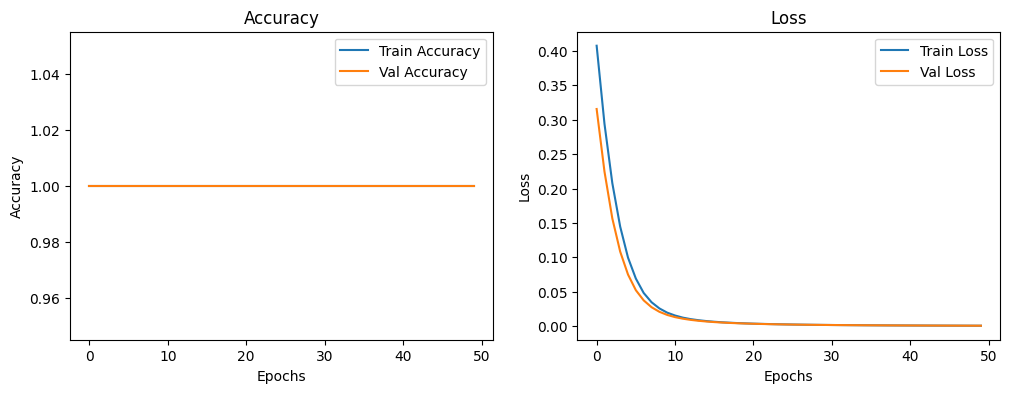

In [18]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 [==============================] - 0s 129ms/step - loss: 0.0011 - accuracy: 1.0000
Test Loss: 0.0011111825006082654
Test Accuracy: 1.0
